#### **1. Data Exploratory**
In the following cells we perform a series of
arithmetic operations to get familiar with the 
data before the visualizing some key observations

In [43]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import nltk
import re

In [33]:
data = pd.read_csv("B:\_GITHUB\Machine-Learning-project-series\stress detection\dataset\data.csv")
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [34]:
# checking for null values 
data.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [35]:
data.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [36]:
data.corr()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
id,1.000000,-0.057570,0.198152,-0.004089,0.001155,0.103680,0.057690,0.013110,0.055287,-0.043653,...,0.027462,-0.042197,-0.023827,-0.044492,-0.058451,0.018026,-0.031343,-0.007265,0.100821,0.034676
label,-0.057570,1.000000,0.023831,-0.006504,-0.053421,-0.092786,0.100473,-0.247933,-0.403804,0.275282,...,-0.297439,-0.032659,-0.012440,0.144963,-0.049756,-0.165470,0.097125,-0.038507,-0.058567,-0.305157
confidence,0.198152,0.023831,1.000000,0.029101,-0.035109,0.034465,-0.005430,0.040150,-0.019701,0.030784,...,0.054247,-0.000609,-0.043655,0.019157,-0.064465,0.066168,-0.006815,-0.056471,0.040245,0.018656
social_timestamp,-0.004089,-0.006504,0.029101,1.000000,-0.015673,0.001516,0.013800,0.001789,-0.013092,0.023516,...,-0.001197,-0.002790,-0.024561,-0.006740,0.007107,0.010445,0.009877,-0.024676,0.002347,0.027996
social_karma,0.001155,-0.053421,-0.035109,-0.015673,1.000000,-0.014104,0.008587,-0.032604,0.049560,-0.073504,...,-0.031136,-0.028579,-0.003248,-0.006415,-0.003452,0.007040,0.099256,0.794517,-0.020001,0.004918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lex_dal_avg_pleasantness,0.018026,-0.165470,0.066168,0.010445,0.007040,-0.105369,-0.064109,-0.070831,0.085443,-0.016854,...,0.374458,0.074514,0.016777,0.108321,-0.026838,1.000000,-0.080428,0.012151,-0.078536,0.320488
social_upvote_ratio,-0.031343,0.097125,-0.006815,0.009877,0.099256,-0.006797,-0.017517,-0.060588,-0.100387,0.086029,...,-0.103184,0.008844,0.004309,0.051622,-0.016455,-0.080428,1.000000,0.011538,-0.014422,-0.073087
social_num_comments,-0.007265,-0.038507,-0.056471,-0.024676,0.794517,-0.042912,0.007982,-0.045950,0.055352,-0.083499,...,-0.017950,-0.048020,-0.008879,-0.033903,-0.002724,0.012151,0.011538,1.000000,-0.045006,0.001583
syntax_fk_grade,0.100821,-0.058567,0.040245,0.002347,-0.020001,0.967380,0.564947,0.270828,0.120024,-0.080276,...,-0.132731,-0.176478,-0.005930,0.000508,0.012685,-0.078536,-0.014422,-0.045006,1.000000,0.070168


#### 2. **Data visualization**
In this step we will vizualize the data distribution of key features.

In [37]:
value = data["subreddit"].value_counts()
value_index = value.index
fig = px.pie(data, values = value, names = value_index, hole = 0.5,width = 700, height = 400)
fig.update_layout(title = "Representation of stress distribution by title", title_x = 0.5)
fig.show()

Text(0.5, 1.0, 'Target class distribution')

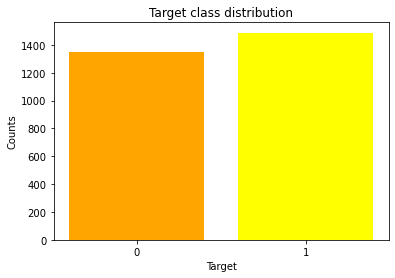

In [38]:
# Class distribution
plt.bar(data['label'].unique(), data['label'].value_counts(), color = ['yellow', 'orange'])
plt.xticks([0,1])
plt.xlabel("Target")
plt.ylabel("Counts")
plt.grid(False)
plt.title("Target class distribution")

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

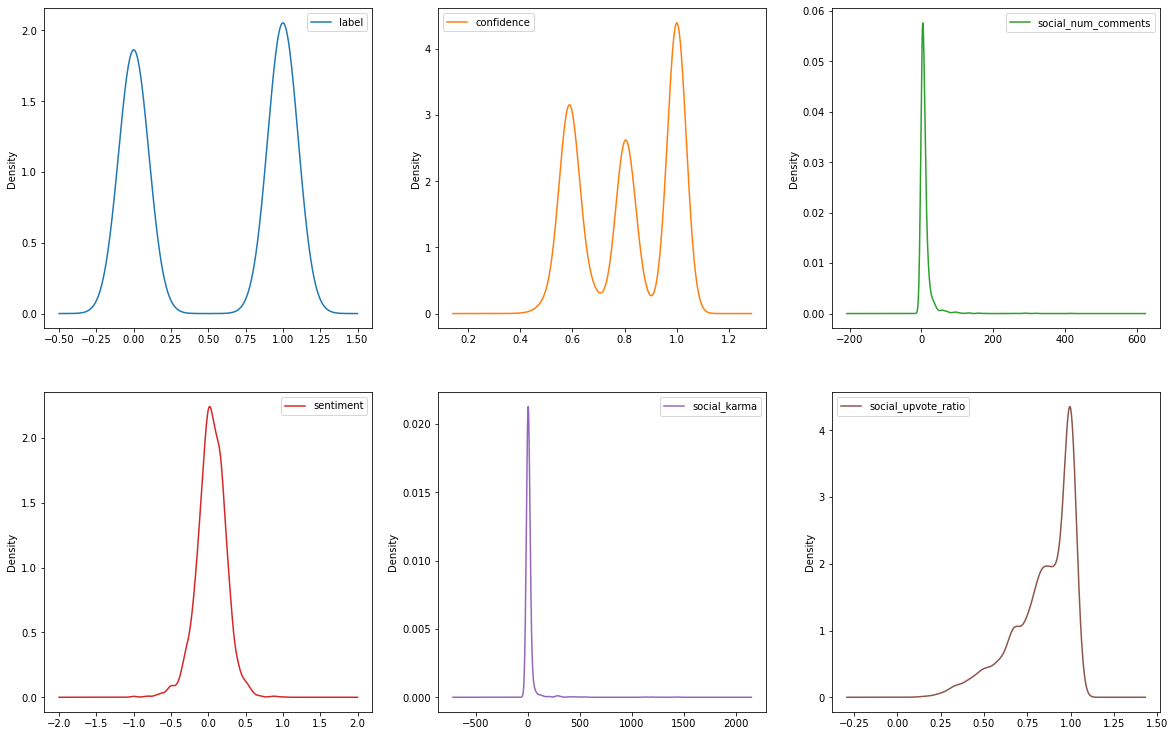

In [39]:
data_dens = data[['subreddit','text','label', 'confidence', 'social_num_comments', 'sentiment', 'social_karma', 'social_upvote_ratio']]
data_dens.plot(kind ="density", figsize=(20,20), sharex = False, subplots = True, layout = (3,3))

#### **3.Data processing**
Here, we process the data we are going to use for our analysis, by performing some cleaning...

In [40]:
data['text'][0]

'He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.'

In [41]:
nltk.download('stopwords')
import string
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = ' '.join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = ' '.join(text)
    return text

data['text'] = data['text'].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
data['text'][0]

'said felt way sugget go rest trigger ahead youir hypocondriac like decid look feel doom hope mayb get suck rabbit hole ludicr conspiraci stupid psychic test new age bs someth could even laugh road end read sens doom indic various health ailment one prone top doom gloomi fn worri heart happen physic  hour'

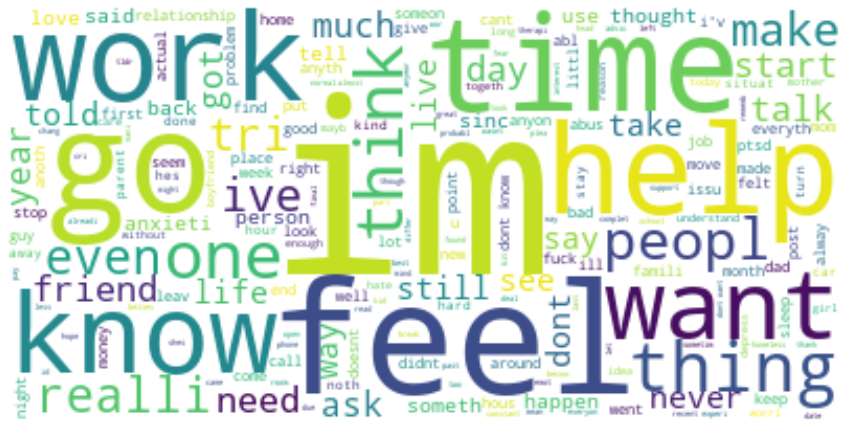

In [55]:
text = ' '.join(word for word in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()